In [ ]:
!pip install nltk
!pip install textblob


In [ ]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Sample movie reviews
reviews = [
    "I loved the movie! The plot was fantastic and the acting was great.",
    "It was an awful experience. The film was too long and boring.",
    "An absolute masterpiece! I would watch it again and again.",
    "I didn't like the movie at all. The characters were not relatable.",
    "The cinematography was beautiful, but the story was lacking."
]

# Create a DataFrame
df = pd.DataFrame(reviews, columns=['Review'])

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Polarity ranges from -1 (negative) to 1 (positive)
    return analysis.sentiment.polarity

# Apply the function to the reviews
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Classify sentiments
df['Sentiment Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the results
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                              Review  Sentiment  \
0  I loved the movie! The plot was fantastic and ...   0.518750   
1  It was an awful experience. The film was too l...  -0.683333   
2  An absolute masterpiece! I would watch it agai...   0.250000   
3  I didn't like the movie at all. The characters...   0.000000   
4  The cinematography was beautiful, but the stor...   0.850000   

  Sentiment Label  
0        Positive  
1        Negative  
2        Positive  
3         Neutral  
4        Positive  


In [ ]:
!pip install yfinance
!pip install sklearn
!pip install matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 49.35227206118223


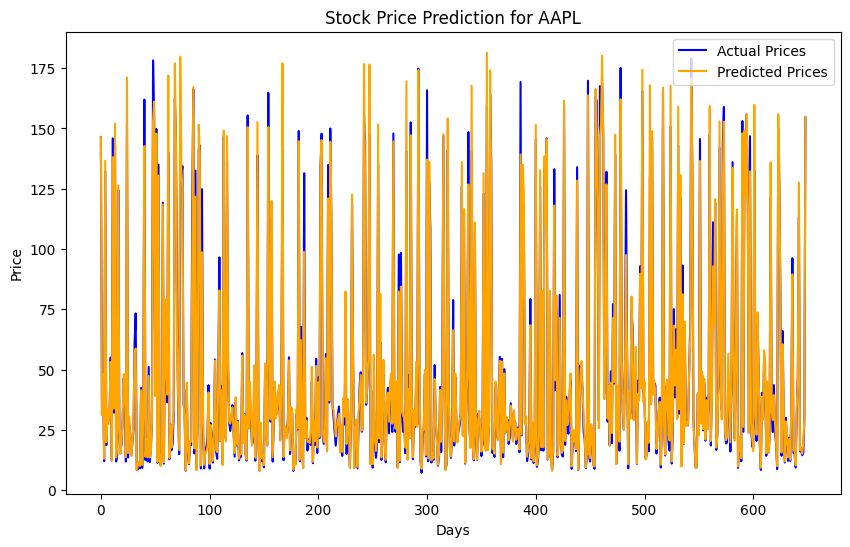

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load stock data using yfinance
# Example: Apple Inc. (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Prepare the data
data['Date'] = data.index
data['Prediction'] = data['Close'].shift(-30)  # Predicting 30 days ahead

# Drop the last 30 rows as they won't have predictions
data.dropna(inplace=True)

# Features and labels
X = np.array(data[['Close']])
y = np.array(data['Prediction'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange')
plt.title(f'Stock Price Prediction for {ticker}')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
!pip install pandas scikit-learn


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5
Confusion Matrix:
[[100   0]
 [100   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



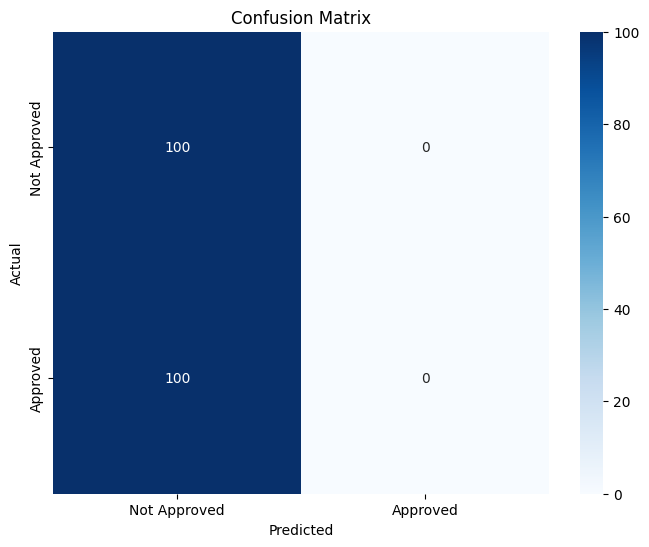

In [ ]:


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic features
data = {
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Married': np.random.choice(['Yes', 'No'], n_samples),
    'Education': np.random.choice(['Graduate', 'Not Graduate'], n_samples),
    'Self_Employed': np.random.choice(['Yes', 'No'], n_samples),
    'ApplicantIncome': np.random.randint(1000, 50000, n_samples),
    'CoapplicantIncome': np.random.randint(0, 30000, n_samples),
    'LoanAmount': np.random.randint(100, 600, n_samples),
    'Loan_Status': np.random.choice(['Y', 'N'], n_samples)
}

df = pd.DataFrame(data)

# Convert categorical variables to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Features and labels
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
